## **Project Name - Yes Bank**

**Project Type** - Regression/Machine Learning

**Contirbution** - Individual

## **Project Summary** -

Write Summary 500-600 words

## **Github Link** -

my github link

## **Problem Statement**

Stock prices are highly volatile and influenced by various factors. In the case of Yes Bank, events like the 2018 fraud case led to sharp fluctuations. Accurately predicting the monthly closing stock price is challenging yet essential for investors and analysts. This project addresses the problem by using historical stock data to build a machine learning model that forecasts closing prices and aids decision-making.

## **Solution**

### **1. Know Your Data**

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loding Dataset

In [2]:
df = pd.read_csv('data_YesBank_StockPrices.csv')

#### Dataset First View

In [3]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


#### Dataset Rows & Columns count

In [4]:
df.shape

(185, 5)

#### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


##### Duplicate Values

In [6]:
df.duplicated().sum()

np.int64(0)

##### Missing Values/Null Values

In [7]:
df.isnull()

,Date,Open,High,Low,Close
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
180,False,False,False,False,False
181,False,False,False,False,False
182,False,False,False,False,False
183,False,False,False,False,False


In [8]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


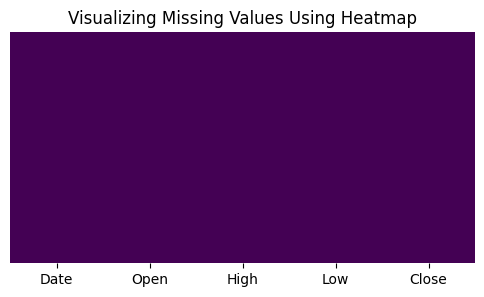

In [9]:
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visualizing Missing Values Using Heatmap')
plt.show()

#### What did you know about your dataset?

This is a monthly time series dataset containing historical stock price data for Yes Bank.

*Dataset Structure:* 185 rows and 5 columns(Date, Open - Price at the beginning of the month, High - Highest price in that month, Low - Lowest price in that month, Close - Price at the end of the month).

*Datatype of columns:* Date: Object type, Open, High, Low, Close: All are float64, representing monthly stock prices.

There are no missing or duplicate values, the dataset is already clean and ready for modeling after minor preprocessing.


## ***2. Understanding Your Variables***

In [10]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

All four are continuous numerical features, and the high standard deviation shows significant volatility in Yes Bank’s stock price over time.

1. Open - Opening stock price for the month. Ranges from ₹10 to ₹369.95. Median (50%) is ₹62.98.

2. High - Highest stock price during the month. Goes up to ₹404. Indicates peak market value.

3. Low - Lowest stock price in the month. Shows market downside, ranging from ₹5.55 to ₹345.50.

4. Close - Final stock price at month end. Median is ₹62.54, max is ₹367.90.

### Check Unique Values for each variable.

In [12]:
for col in df.columns:
  print(f"Unique values of {col} are :", df[col].unique(),"\n")

Unique values of Date are : ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May

In [14]:
for col in df.columns:
    print(f"{col} have {df[col].nunique()} unique values")

Date have 185 unique values
Open have 183 unique values
High have 184 unique values
Low have 183 unique values
Close have 185 unique values


Date has 185 unique values, confirming that each row represents a unique month.

Other variables have high uniqueness (close to total rows), so they are not categorical, they're all numerical and continuous.

## ***3. Data Wrangling***

###Data Wrangling Code

In [15]:
# converting the type of col 'Date' to datetime64[ns] format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [16]:
# checking the updated datatype of col 'Date'
df['Date'].dtypes

dtype('<M8[ns]')

In [17]:
# sorting the df chronologically (if not sorted earlier)
df = df.sort_values('Date').reset_index(drop=True)

In [18]:
print(f"Range of Date is : {df['Date'].min()} , {df['Date'].max()}")

Range of Date is : 2005-07-01 00:00:00 , 2020-11-01 00:00:00


In [19]:
# adding new col 'Year' 'Month' for better understanding
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [20]:
# checking whether new columns are added successfully or not
df.head(2)

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8


In [21]:
# as we added new cols 'Year' and 'Month' we can drop the col 'Date'
df.drop('Date',axis=1,inplace=True)

In [22]:
# checking
df.head(2)

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,7
1,12.58,14.88,12.55,13.42,2005,8


###What all manipulations have you done and insights you found?

answer

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Scatter Plot

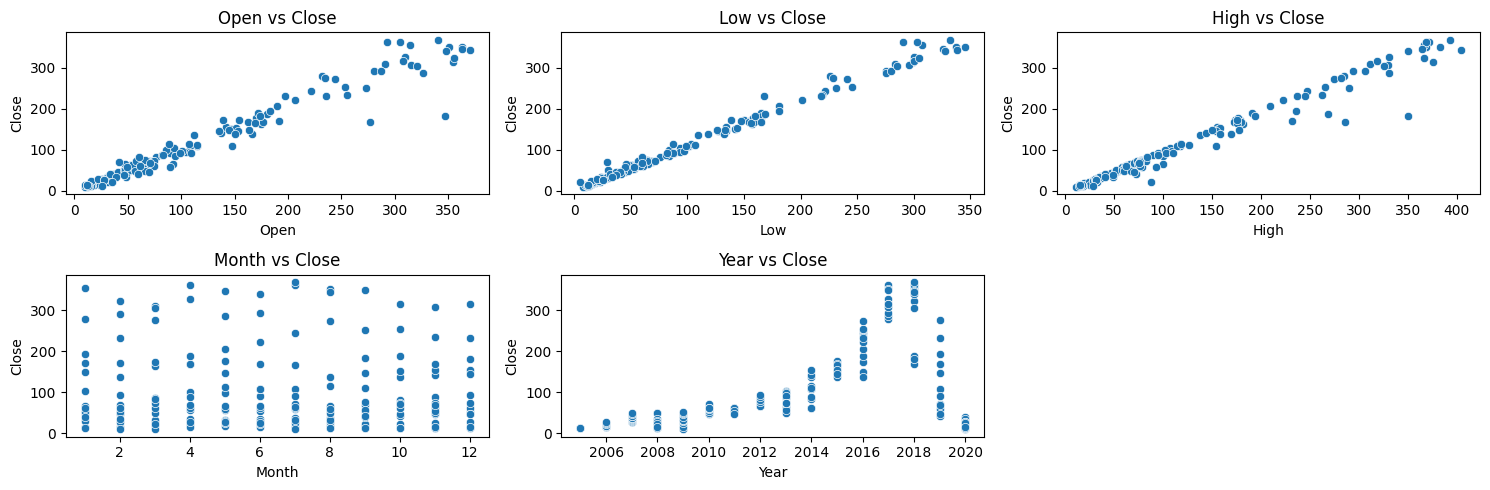

In [25]:
plt.figure(figsize=(15, 5))

# Relation between 'Close' and 'Open'
plt.subplot(2, 3, 1)
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Open vs Close')

# Relation between 'Close' and 'Low'
plt.subplot(2, 3, 2)
sns.scatterplot(x='Low', y='Close', data=df)
plt.title('Low vs Close')

# Relation between 'Close' and 'High'
plt.subplot(2, 3, 3)
sns.scatterplot(x='High', y='Close', data=df)
plt.title('High vs Close')

# Relation between 'Close' and 'Month'
plt.subplot(2, 3, 4)
sns.scatterplot(x='Month', y='Close', data=df)
plt.title('Month vs Close')

# Relation between 'Close' and 'Month'
plt.subplot(2, 3, 5)
sns.scatterplot(x='Year', y='Close', data=df)
plt.title('Year vs Close')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


*  It help us visually inspect whether a linear relationship exists between varibales
*  It helps to check data is evenly spread, clustered, or skewed, which can affect the model’s accuracy.
*  Show if there are any outliers, which might need special handling or removal.






##### 2. What is/are the insight(s) found from the chart?


* Input features - Open, Low, and High show a strong positive linear relationship with the Close price.
* Input features - Month and Year does not show any linear relation with the Close price.
* It does not showing major outliers or abnormal patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

answer

#### Chart-2

Histogram

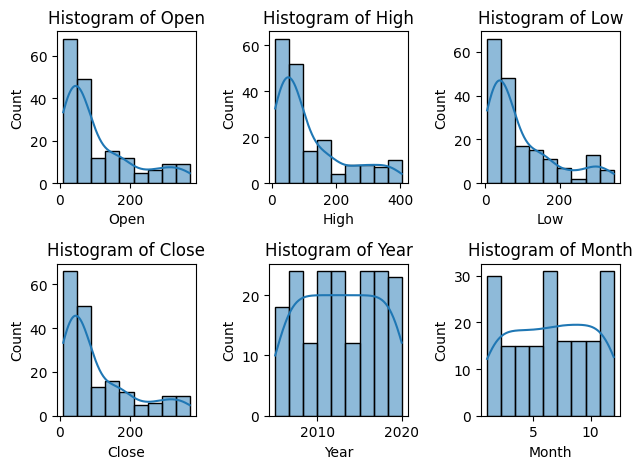

In [34]:
for i, col in enumerate(df.columns[:6]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

#### Chart-3

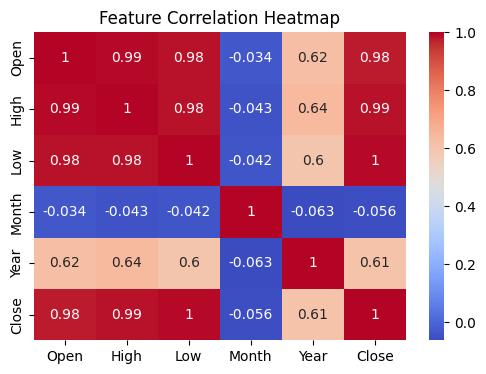

In [35]:
# correlations

plt.figure(figsize=(6, 4))
sns.heatmap(df[['Open', 'High', 'Low', 'Month','Year' ,'Close']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### Chart-4

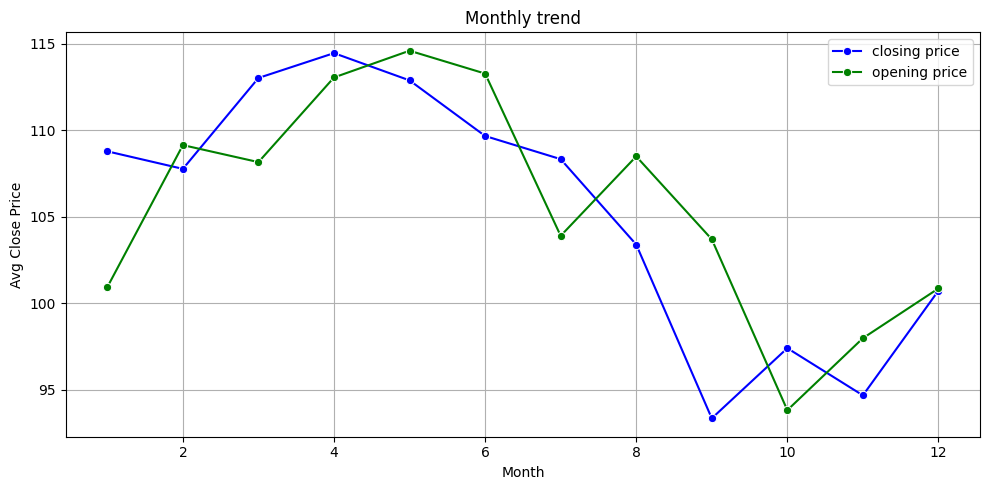

In [36]:
# Understanding pattern between closing price year and month

# taking average of closing price and opening price monthly basis
monthly_avg = df.groupby('Month')[['Close','Open']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='Month', y='Close', marker='o', color='blue',label='closing price')
sns.lineplot(data=monthly_avg, x='Month', y='Open', marker='o', color='green',label='opening price')
plt.title('Monthly trend')
plt.xlabel('Month')
plt.ylabel('Avg Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Chart - 5

<Figure size 500x500 with 0 Axes>

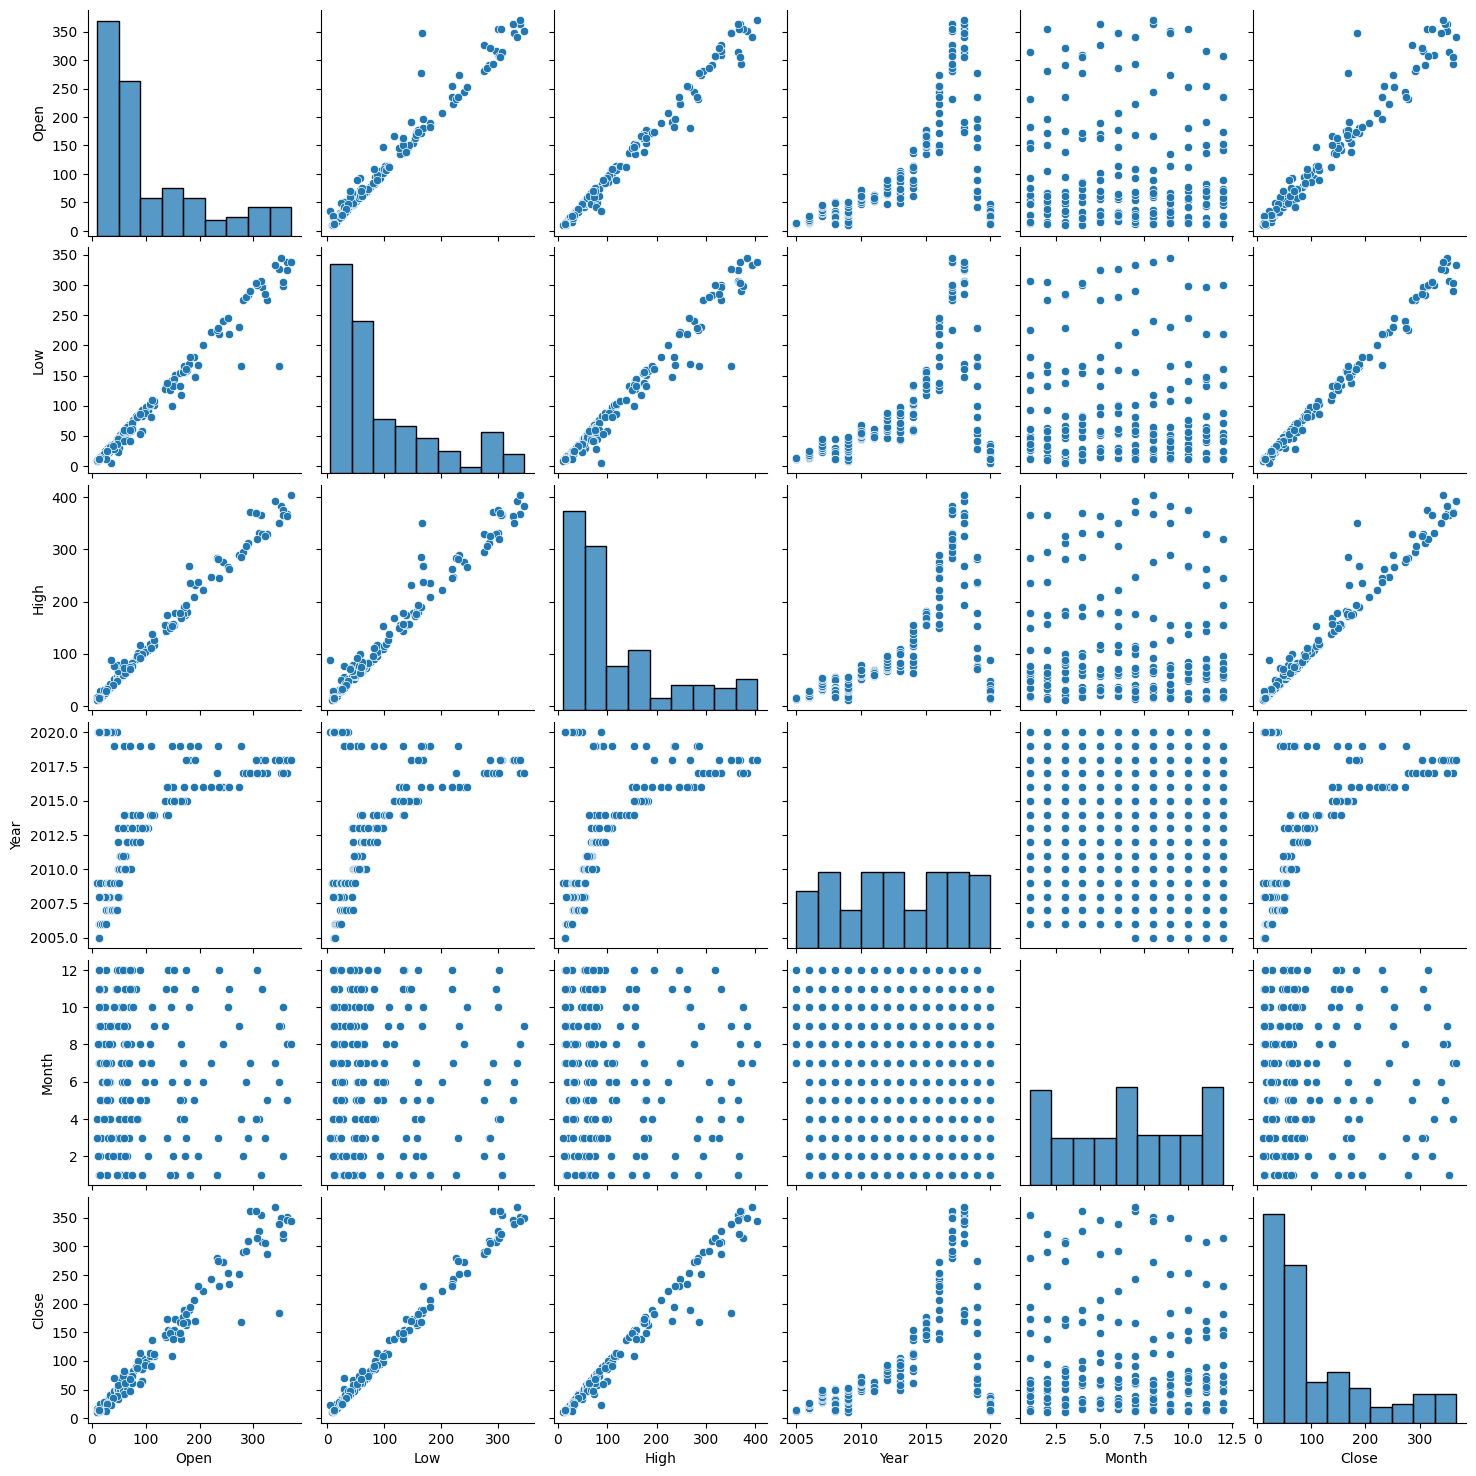

In [42]:
plt.figure(figsize=(5,5))

selected_features = ['Open','Low','High','Year','Month','Close']
sns.pairplot(df, vars=selected_features)
plt.show()

## ***5. Hypothesis Testing***

In [ ]:
# normalize or scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_cols = ['Open', 'High', 'Low', 'Close']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [ ]:
# model building

In [ ]:
# Features and Target
X = df[['Open', 'High', 'Low']]
y = df['Close']

In [ ]:
from sklearn.model_selection import train_test_split

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 0.0007
R-squared Score: 0.9904


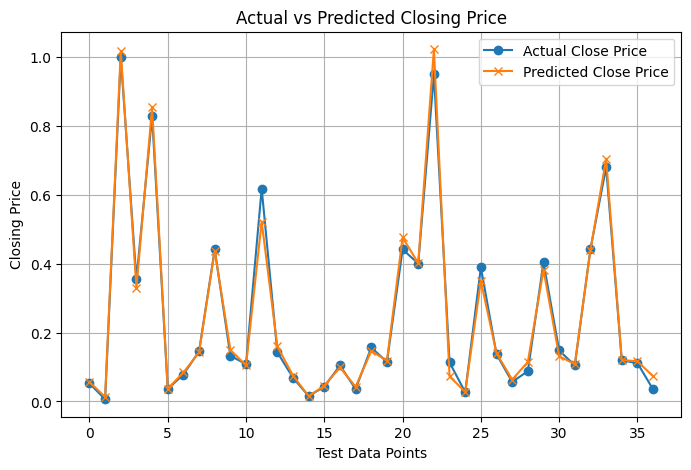

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual Close Price', marker='o')
plt.plot(y_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs Predicted Closing Price')
plt.xlabel('Test Data Points')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()